E003. Para el fichero insurance.csv muestra una figura con cuatro subplots, uno por cada región. En el eje x tiene que estar la edad y el en el eje y el coste del seguro. Hay que diferenciar (con colores, marcadores o tamaños) entre fumadores y no fumadores. Para hacer la comparación más sencilla, es importante que los cuatro subplots tengan la misma escala en los ejes y que haya títulos en la figura, los subplots y los ejes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# %matplotlib qt
%matplotlib inline

In [3]:
# para google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path= "../datos/"
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "insurance.csv", sep = ",")
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Empezamos creando una columna como fumador pero con número

In [5]:
datos["fumador"] = datos.smoker.astype('category').cat.codes
datos.head()

,age,sex,bmi,children,smoker,region,charges,fumador
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [6]:
hombres = datos.query("sex=='male'")
mujeres = datos.query("sex=='female'")

In [7]:
from matplotlib.colors import ListedColormap

En este caso creamos la leyenda "a mano".
Con sharex y sharey comparten la mima escala.

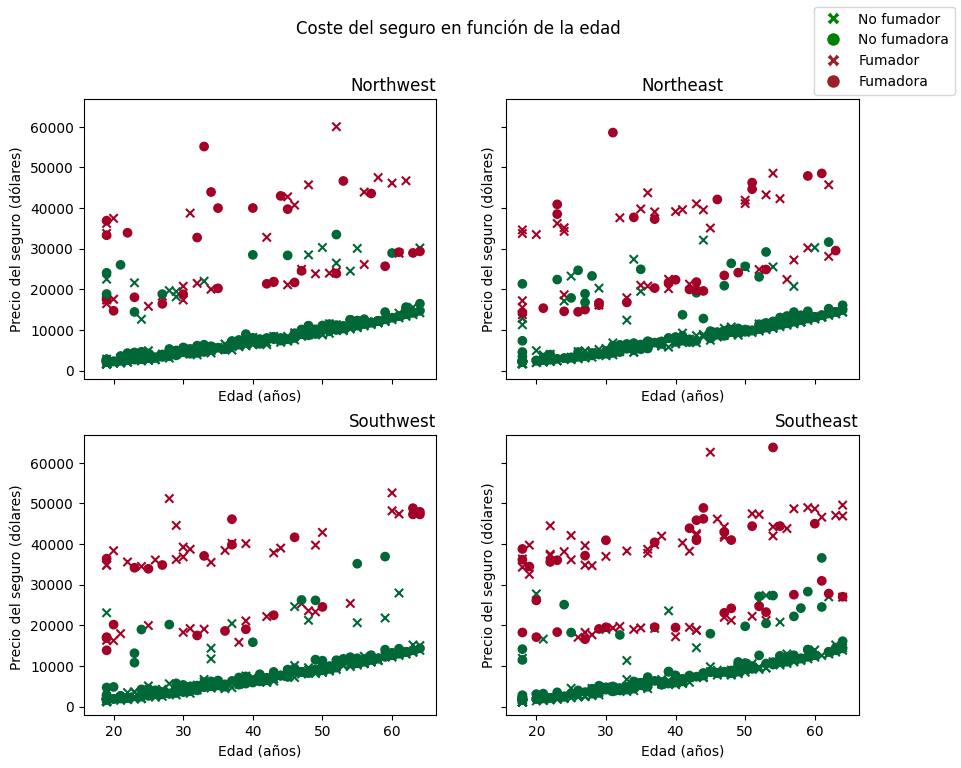

In [12]:
fig, ax = plt.subplots(2, 2, sharey = True, sharex = True)
fig.set_size_inches(w = 10, h = 8)
fig.suptitle("Coste del seguro en función de la edad")

#ax[0, 0].scatter(x = 'age', y = 'charges', data = hombres[hombres.region=='northwest'], c = 'fumador', cmap = ListedColormap(['green', 'red']), marker = 'x', label='_nolegend_')
# cmap = 'RdYlGn_r' --> mapea en Red Yellow Green (_reverse) el valor de c = 'fumador'
ax[0, 0].scatter(x = 'age', y = 'charges', data = hombres[hombres.region=='northwest'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'x', label='_nolegend_')
ax[0, 0].scatter(x = 'age', y = 'charges', data = mujeres[mujeres.region=='northwest'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'o',label='_nolegend_')
ax[0, 0].set_title("Northwest",  loc='right')

ax[0, 1].scatter(x = 'age', y = 'charges', data = hombres[hombres.region=='northeast'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'x', label='_nolegend_')
ax[0, 1].scatter(x = 'age', y = 'charges', data = mujeres[mujeres.region=='northeast'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'o', label='_nolegend_')
ax[0, 1].set_title("Northeast",  loc='center')

ax[1, 0].scatter(x = 'age', y = 'charges', data = hombres[hombres.region=='southwest'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'x', label='_nolegend_')
ax[1, 0].scatter(x = 'age', y = 'charges', data = mujeres[mujeres.region=='southwest'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'o',label='_nolegend_')
ax[1, 0].set_title("Southwest",  loc='right')

ax[1, 1].scatter(x = 'age', y = 'charges', data = hombres[hombres.region=='southeast'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'x', label='_nolegend_')
ax[1, 1].scatter(x = 'age', y = 'charges', data = mujeres[mujeres.region=='southeast'], c = 'fumador', cmap = 'RdYlGn_r', marker = 'o',label='_nolegend_')
ax[1, 1].set_title("Southeast", loc= 'right')

# tal vez se pueda prescindir de las etiquetas en alguno de los plots
ax[0, 0].set_xlabel("Edad (años)")
ax[0, 1].set_xlabel("Edad (años)")
ax[1, 0].set_xlabel("Edad (años)")
ax[1, 1].set_xlabel("Edad (años)")

ax[0, 0].set_ylabel("Precio del seguro (dólares)")
ax[0, 1].set_ylabel("Precio del seguro (dólares)")
ax[1, 0].set_ylabel("Precio del seguro (dólares) ")
ax[1, 1].set_ylabel("Precio del seguro (dólares)")

# leyenda creada "a mano"
legend_elements = [
    # esto es una linea que es solo un punto: o X; por eso es [0], [0]
    Line2D([0], [0], marker='X', color='w', label='No fumador',  markerfacecolor='g', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No fumadora',  markerfacecolor='g', markersize=10),
    Line2D([0], [0], marker='X', color='w', label='Fumador',  markerfacecolor= (156/255.0, 32/255.0, 41/255.0), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Fumadora',  markerfacecolor= (156/255.0, 32/255.0, 41/255.0), markersize=10)
]

fig.legend(handles=legend_elements, loc='upper right')

plt.show()

